<a href="https://colab.research.google.com/github/Nova1323/Machine-Learning/blob/master/Logistic%20Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
**_Note:_** Logistic Regression is an Classification Model and **Not** a Regression Model

## Importing Libraries
The following Libraries are imported:

1. Numpy for modifing and manupilating arrays, and their shapes and sizes
2. Pandas for Dataframes
3. Matplotlib for visualization
4. Sci-kit Learn for Machine Learning Models, Data Manupilation and Feature Engineering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report

## Importing Data
The data used for this problem can be download via this [link](http://iali.in/datasets/mushrooms.csv).

The data has details of Mushrooms and we will use this data to classify if the Mushroom is Edible or Poisonous

In [2]:
ds = pd.read_csv('http://iali.in/datasets/mushrooms.csv')

We can we the information of the dataset by the `info()` method.

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

To view how the data is stored we use the `head()` method.

In [4]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## Feature Engineering

As we can see the data contains alphabets to represent the characteristics of the mushrooms but as we know Machine Learning Models work better on numeric data we will be using feature engineering on this dataset.

for this we use the preprocessing class from the Sci-kit Learn library we can do this `from sklearn.preprocessing import LabelEncoder`

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for i in ds.columns:
  ds[i]=label_encoder.fit_transform(ds[i])

ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


## Splitting the data in training and test data
For this, we first decide what are our features and labels. For this, we make use of the Pandas Library.

After which we use the `train_test_spilt()` function from Sci-kit Learn to split the data into Training and Test data.

In [6]:
X = ds.iloc[:,1:23].values #select the features but classes
Y = ds.iloc[:,0].values #select classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Training the Model
We first import the `LogisticRegression` Model from Sci-kit Learn by using `from sklearn.linear_model import LogisticRegression`. We then assign this model to variable. The model is then fit to the training data using the `fit()` method.

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Testing the Model

Now to check how good the model is performing we make use of the `predict()` method and use the test data on it.
We then use the accuracy score function from Sci-kit Learn's Metrics Class to get to know how accurate our model is.

In [8]:
lrpredictions = lr.predict(X_test)
print('accuracy = ',accuracy_score(lrpredictions,y_test)*100,'%')

accuracy =  95.19999999999999 %


## Visualizing the Results

To see how accurate our model was or how precise it was we make use of classification report. This can also be imported from Sci-kit Learn and is the same class as the accuracy score function.

In [9]:
labels = ["Edible", "Poisonous"]
report = classification_report(y_test, lrpredictions, target_names=labels)
print(report)

              precision    recall  f1-score   support

      Edible       0.95      0.96      0.95       852
   Poisonous       0.96      0.94      0.95       773

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



To see how well the Model worked we can also use a Confusion Matrix.
The Confusion Matrix is a grid where we can see how many True Positives, True Negatives, False Positives, and False Negatives were predicted by the Model.

A True Positive is a 1 predicted by our model and the Actual Label is also a 1 while A True Negative is a 0 predicted by our model and the Actual Label is also a 0.

A False Positive is a 1 predicted by our model while the Actual Label is a 0 and A False Negative is a 0 predicted by our model while the Actual Label is a 1

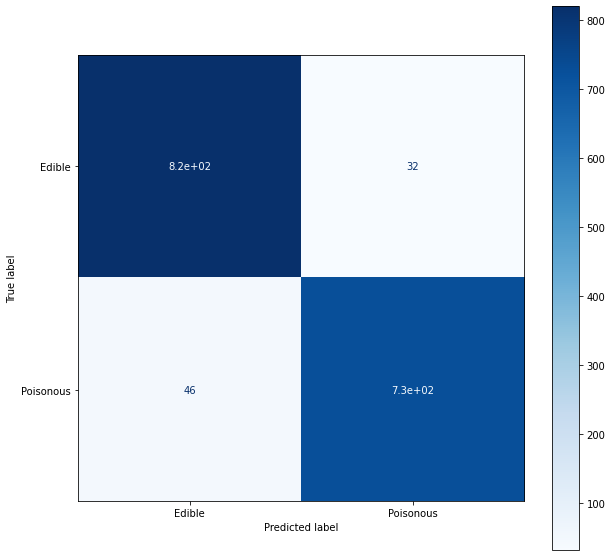

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ds_cm = plot_confusion_matrix(lr,X_test, y_test,cmap=plt.cm.Blues,ax=ax,display_labels=labels)